![](https://brand.infojobs.net/downloads/ij-logo_default/ij-logo-default_primary.jpg)

# Analyzing Job Offers from InfoJobs with Python

Are you looking for a job in Spain? Do you want to know which companies are hiring, what skills are in demand, and what salaries you can expect? If so, you're in luck! In this article, we'll show you how to analyze job offers from InfoJobs, a popular job search website in Spain, using Python and several libraries.

All the code used in this article is publicly available in this [GitHub repository](https://github.com/ericmg97/infojobs-analysis/) 

## Introduction

InfoJobs is a leading job search website in Spain, with thousands of job offers in various fields and industries. However, with so many job offers to choose from, it can be difficult to know which ones are worth applying for. That's where data analysis comes in. By analyzing job offer data, we can gain insights into which companies are hiring, what skills are in demand, and what salaries we can expect.

In this article, we'll show you how to analyze job offer data from InfoJobs using Python and several libraries, including pandas, matplotlib, and NLTK. We'll start by retrieving the data from InfoJobs using their API, and then we'll clean, analyze, and visualize the data to gain insights into the job market in Spain.

## Sections

The article is divided into several sections, each of which performs a different task:

- **Libraries**: Imports the libraries used in the article.
- **Data Retrieval**: Downloads the job offer data from InfoJobs using their API.
- **Data Cleaning**: Cleans the data by removing duplicates, filling missing values, and converting data types.
- **Data Analysis**: Analyzes the data by calculating statistics and creating visualizations.
- **Conclusion**: Summarizes the findings of the analysis and suggests areas for further research.
- **Aknowledgements**: Credits to all the people and organizations that made this article possible.

The article is designed to be read in order, with each section building on the previous one. The article assumes that you have a basic understanding of Python and data analysis techniques.

## Libraries

First of all, we'll import the libraries we'll need for the analysis:

In [153]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from utils import take_value_from_dict, transform_salary_float, plot_salary_outliers, update_salary_range, plot_salary_heatmap

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/eric/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Retrieval

In this section, we'll download the job offer data from InfoJobs using their API. The API allows us to retrieve job offer data in JSON format, which we can then convert to a pandas DataFrame for further analysis.

In [154]:
get_datasets = os.path.join(os.pardir, 'get-datasets.py')

# Download the datasets from InfoJobs API
! python {get_datasets}

# Set the data directory
data_dir = os.path.join(os.pardir, 'data')

# Read the csv files
df_jobs = pd.read_csv(os.path.join(data_dir, 'jobs_dataset.csv'))
df_countries = pd.read_csv(os.path.join(data_dir, 'country_dataset.csv'))
df_provinces = pd.read_csv(os.path.join(data_dir, 'province_dataset.csv'))


The jobs dataset is already cached

The country dataset is already cached

The province dataset is already cached


## Data Cleaning

After retrieving the job offer data from InfoJobs using their API, the next step is to explore the data to gain a better understanding of its structure and contents. Exploring the data can help us identify any issues or inconsistencies in the data, such as missing values or outliers, and can also help us identify patterns or trends in the data that we can use to guide our analysis.

Some of the things we might want to explore in the data include:

- The number of job offers in the dataset
- The distribution of job offers by category, location, or company
- The most common job titles or skills in the dataset
- The salary ranges or distributions for different job categories or locations

By exploring the data, we can gain insights into the job market in Spain and identify areas for further analysis. This can help us make informed decisions about our careers and job search strategies.

In the next section, we'll explore the job offer data in more detail and perform some basic data cleaning and preparation steps to get the data ready for analysis.

First, lets look at the head of the DataFrame to see what the data looks like:

In [155]:
# Show all columns
pd.set_option('display.max_columns', None)

df_jobs.head()

,id,title,province,city,link,category,contractType,subcategory,salaryMin,salaryMax,salaryPeriod,experienceMin,workDay,study,teleworking,published,updated,author,requirementMin,bold,applications,subSegment,executive,salaryDescription,multiProvince,urgent,color
0,948c2d14684cdca15045da2e35d855,Jefe de Proyecto Java / PHP (Grado IT),"{'id': 33, 'value': 'Madrid'}",Madrid,https://www.infojobs.net/madrid/jefe-proyecto-...,"{'id': 150, 'value': 'Informática y telecomuni...","{'id': 1, 'value': 'Indefinido'}","{'id': 3110, 'value': 'Gestión de proyectos'}","{'id': 420, 'value': '44.000 €'}","{'id': 440, 'value': '50.000 €'}","{'id': 3, 'value': 'Bruto/año'}","{'id': 5, 'value': 'Más de 5 años'}","{'id': 1, 'value': 'Completa'}","{'id': 120, 'value': 'Ingeniería Técnica'}","{'id': 3, 'value': 'Híbrido'}",2023-06-05T21:42:02.000Z,2023-06-05T21:42:02.000Z,"{'id': '9b37c0dbf84572afbd6ab8a3e49678', 'priv...",¿Qué debes saber?\n\n- Metodologías ágiles: Sc...,False,0,31,True,44.000€ - 50.000€ Bruto/año,False,False,False
1,fd5278c9354779a545b820ac97cf05,Cocinero/a,"{'id': 49, 'value': 'Valencia/València'}",Bocairent,https://www.infojobs.net/bocairent/cocinero/of...,"{'id': 160, 'value': 'Turismo y restauración'}","{'id': 1, 'value': 'Indefinido'}","{'id': 3115, 'value': 'Hostelería'}","{'id': 1090, 'value': '1.300 €'}","{'id': 1130, 'value': '1.900 €'}","{'id': 2, 'value': 'Bruto/mes'}","{'id': 2, 'value': 'Al menos 1 año'}","{'id': 1, 'value': 'Completa'}","{'id': 35, 'value': 'Ciclo Formativo Grado Med...","{'id': 1, 'value': 'Presencial'}",2023-05-30T11:06:30.000Z,2023-06-05T21:37:27.000Z,{'id': '50485249495110177105105023304515501868...,NaN,False,0,11,False,1.300€ - 1.900€ Bruto/mes,False,False,False
2,12c32368e64b2b8cac770083b49452,Odontólogo/a,"{'id': 22, 'value': 'Guadalajara'}",Guadalajara,https://www.infojobs.net/guadalajara/odontolog...,"{'id': 140, 'value': 'Sanidad y salud'}","{'id': 1, 'value': 'Indefinido'}","{'id': 3140, 'value': 'Odontología'}","{'id': 1070, 'value': '1.050 €'}","{'id': 170, 'value': '1.800 €'}","{'id': 2, 'value': 'Bruto/mes'}","{'id': 3, 'value': 'Al menos 3 años'}","{'id': 5, 'value': 'Parcial - Indiferente'}","{'id': 140, 'value': 'Licenciatura'}","{'id': 1, 'value': 'Presencial'}",2023-06-05T21:32:09.000Z,2023-06-05T21:32:09.000Z,{'id': '98565348555048797869866023058422609649...,NaN,False,0,22,False,1.050€ - 1.800€ Bruto/mes,False,False,False
3,d8727e153b4a4db0e369fb25e49533,Camarero/a de barra,"{'id': 40, 'value': 'Pontevedra'}",A Illa de Arousa,https://www.infojobs.net/a-illa-de-arousa/cama...,"{'id': 160, 'value': 'Turismo y restauración'}","{'id': 9, 'value': 'Fijo discontinuo'}","{'id': 3115, 'value': 'Hostelería'}","{'id': 150, 'value': '1.200 €'}","{'id': 160, 'value': '1.500 €'}","{'id': 2, 'value': 'Bruto/mes'}","{'id': 2, 'value': 'Al menos 1 año'}","{'id': 10, 'value': 'Indiferente'}","{'id': 20, 'value': 'Educación Secundaria Obli...","{'id': 1, 'value': 'Presencial'}",2023-05-29T21:26:06.000Z,2023-06-05T21:30:03.000Z,{'id': '98485755535156658269793023115726808674...,NaN,False,0,11,False,1.200€ - 1.500€ Bruto/mes,False,False,False
4,8fba30d3694294bfaee1a6db9a2500,MECANICO EBIKES,"{'id': 41, 'value': 'Salamanca'}",Santa Marta de Tormes,https://www.infojobs.net/santa-marta-de-tormes...,"{'id': 180, 'value': 'Otros'}","{'id': 5, 'value': 'Otros contratos'}","{'id': 3123, 'value': 'Sin especificar'}","{'id': 0, 'value': ''}","{'id': 0, 'value': ''}","{'id': 0, 'value': ''}","{'id': 3, 'value': 'Al menos 3 años'}","{'id': 1, 'value': 'Completa'}","{'id': 30, 'value': 'Formación Profesional Gra...","{'id': 1, 'value': 'Presencial'}",2023-05-22T20:39:08.000Z,2023-06-05T21:30:03.000Z,{'id': '98484955504851836578835023228061805884...,NaN,False,0,11,False,Salario no disponible,False,False,False


Then, we'll look at the info of the dataframes to see what columns we have and what data types they are:

In [156]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59049 entries, 0 to 59048
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 59049 non-null  object
 1   title              59049 non-null  object
 2   province           59049 non-null  object
 3   city               59049 non-null  object
 4   link               59049 non-null  object
 5   category           59049 non-null  object
 6   contractType       59049 non-null  object
 7   subcategory        59049 non-null  object
 8   salaryMin          59049 non-null  object
 9   salaryMax          59049 non-null  object
 10  salaryPeriod       59049 non-null  object
 11  experienceMin      59049 non-null  object
 12  workDay            59049 non-null  object
 13  study              59049 non-null  object
 14  teleworking        55298 non-null  object
 15  published          59049 non-null  object
 16  updated            59049 non-null  objec

In [157]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      204 non-null    int64 
 1   value   204 non-null    object
 2   order   204 non-null    int64 
 3   key     204 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.5+ KB


In [158]:
df_provinces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      944 non-null    int64 
 1   value   944 non-null    object
 2   order   944 non-null    int64 
 3   key     944 non-null    object
 4   parent  944 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 37.0+ KB


After looking at the info of the dataframes, we can start cleaning the data. This involves removing duplicates, filling missing values, and converting data types. We'll also create some new columns to make the data easier to analyze. 

These are the steps we'll take to clean the data:

1. **Drop duplicates**: The first step in cleaning the `df_jobs` DataFrame is to drop any duplicate rows. This is done using the `drop_duplicates()` method, which removes any rows that have the same values in all columns.

2. **Assign new columns**: The next step is to assign new columns to the DataFrame based on the values in existing columns. Extracting the info from the JSON dictionary using the helper functions available in the `utils.py` file. This is done using the `assign()` method, which takes a dictionary of column names and values as input.
   
3. **Clean column values**: The lambda functions used in the `assign()` method are used to clean the values in the new columns. For example, the `province` column is cleaned by mapping the values from a JSON dictionary to a string using the `take_value_from_dict` function. Similarly, the `salaryMin` and `salaryMax` columns are cleaned by mapping the values to a float using the `transform_salary_float` function.

4. **Drop rows with missing values**: The next step is to drop any rows that have missing values in the `salaryMin`, `salaryMax`, or `teleworking` columns. This is done using the `dropna()` method.

5. **Merge with other DataFrames**: The next step is to merge the `df_jobs` DataFrame with two other DataFrames, `df_provinces` and `df_countries`, this step is necessary to get the country that the job offer is from. This is done using the `merge()` method.

6. **Rename columns**: The next step is to rename some of the columns in the DataFrame. This is done using the `rename()` method.

7. **Filter rows**: The next step is to filter the rows in the DataFrame to only include job offers in Spain. This is done using the `query()` method and the `country` column. The resulting DataFrame is then filtered to only include the columns we're interested in using the `filter()` method.

8. **Update Salary Range**: The final step is to update the `salaryMin` and the `salaryMax` columns using the `salaryPeriod` column, which indicates whether the salary is per hour, per day, per month, or per year. All salary values are transformed to per year, which is the most common salary period in the dataset. This is done using the `update_salary_range()` function available in the `utils.py` file.
   
Overall, this code performs several cleaning and transformation steps on the `df_jobs` DataFrame. The resulting DataFrame is saved as `df_clean` and is used for further analysis.

In [159]:
df_clean = (df_jobs
 .drop_duplicates()
 .assign(
    province_id=lambda df: df.province.apply(take_value_from_dict, key='id'),
    province=lambda df: df.province.map(take_value_from_dict),
    category=lambda df: df.category.map(take_value_from_dict),
    subcategory=lambda df: df.subcategory.map(take_value_from_dict),
    contractType=lambda df: df.contractType.map(take_value_from_dict),
    teleworking=lambda df: df.teleworking.map(take_value_from_dict),
    salaryMin=lambda df: df.salaryMin.map(transform_salary_float),
    salaryMax=lambda df: df.salaryMax.map(transform_salary_float),
    salaryPeriod=lambda df: df.salaryPeriod.map(take_value_from_dict),
    author=lambda df: df.author.apply(lambda value: take_value_from_dict(value, key='name')),
    published = lambda df: pd.to_datetime(df.published).dt.tz_localize(None),
 )
.dropna(subset=['salaryMin', 'salaryMax', 'teleworking'])
.merge(df_provinces, how='left', left_on='province_id', right_on='id')
.merge(df_countries, how='left', left_on='parent', right_on='id')
.rename(columns={ 'value_y': 'country', 'id_x': 'job_id' })
.query('country == "España"')
.filter(
        [
            'title',
            'value_y',
            'province',
            'category',
            'subcategory',
            'contractType',
            'teleworking',
            'salaryMin',
            'salaryMax',
            'salaryPeriod',
            'author',
            'published'
        ])
.apply(update_salary_range, axis=1)
.reset_index(drop=True)
)

We can now look at the head of the cleaned DataFrame to see what the data looks like:

In [160]:
df_clean.head()

,title,province,category,subcategory,contractType,teleworking,salaryMin,salaryMax,salaryPeriod,author,published
0,Jefe de Proyecto Java / PHP (Grado IT),Madrid,Informática y telecomunicaciones,Gestión de proyectos,Indefinido,Híbrido,44000.0,50000.0,Bruto/año,ENTELGY - Zona Madrid,2023-06-05 21:42:02
1,Cocinero/a,Valencia/València,Turismo y restauración,Hostelería,Indefinido,Presencial,15600.0,22800.0,Bruto/mes,Miguel Vaño Silvestre,2023-05-30 11:06:30
2,Odontólogo/a,Guadalajara,Sanidad y salud,Odontología,Indefinido,Presencial,12600.0,21600.0,Bruto/mes,ONEVEN MEDICA SL.,2023-06-05 21:32:09
3,Camarero/a de barra,Pontevedra,Turismo y restauración,Hostelería,Fijo discontinuo,Presencial,14400.0,18000.0,Bruto/mes,AREOSO FUN SOCIEDAD LIMITADA.,2023-05-29 21:26:06
4,Detective Privado Dependiente,Madrid,"Profesiones, artes y oficios",Seguridad y vigilancia,Indefinido,Presencial,19200.0,24000.0,Bruto/mes,GRUPO INVESTIBERICA SL.,2023-05-15 20:15:23


Also, we can look at the info of the cleaned DataFrame to see what columns we have and what data types they are:

In [161]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23638 entries, 0 to 23637
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         23638 non-null  object        
 1   province      23638 non-null  object        
 2   category      23638 non-null  object        
 3   subcategory   23638 non-null  object        
 4   contractType  23638 non-null  object        
 5   teleworking   23638 non-null  object        
 6   salaryMin     23638 non-null  float64       
 7   salaryMax     23638 non-null  float64       
 8   salaryPeriod  23638 non-null  object        
 9   author        23638 non-null  object        
 10  published     23638 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 2.0+ MB


Now, lets look if there are outliers in the data, we can do this by looking at the distribution of the `salaryMin` and `salaryMax` columns:

In [162]:
df_clean.filter(['salaryMin', 'salaryMax']).describe()

,salaryMin,salaryMax
count,23638.000000,23638.000000
mean,19928.964083,26160.634741
std,8135.093392,14753.968734
min,3.000000,12.000000
25%,15000.000000,18000.000000
50%,18000.000000,23000.000000
75%,24000.000000,30000.000000
max,252000.000000,288000.000000


As we can see, there are some outliers in the data, which we'll need to remove before we can start to analyze the data. With the function `plot_salary_outliers` given in the `utils.py` file, we can plot them:

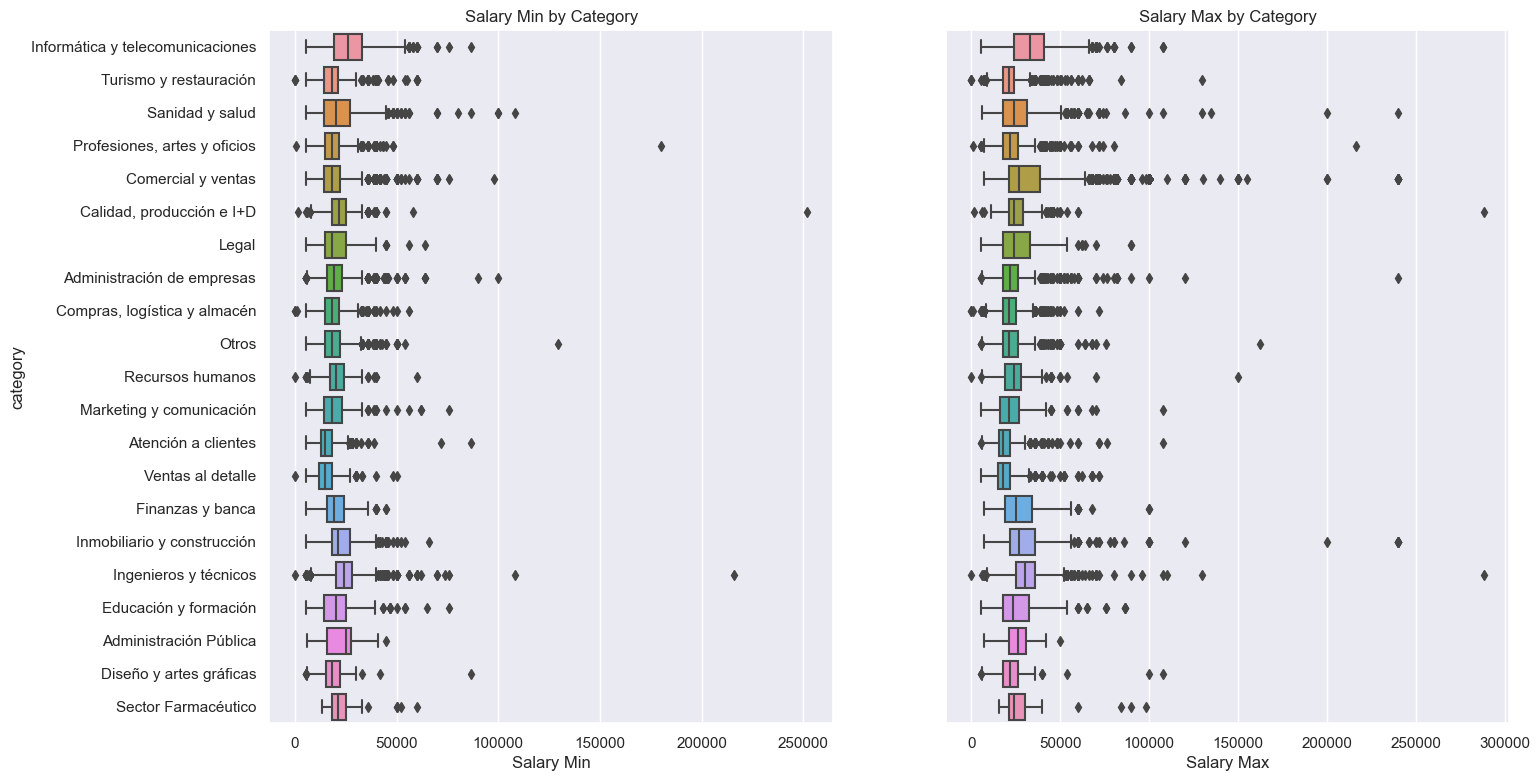

In [163]:
plot_salary_outliers(df_clean)

There are several ways to remove outliers from a dataset, but one of the most common methods is to use the interquartile range (IQR). The IQR is a measure of the spread of the data, and it is calculated as the difference between the 75th and 25th percentiles of the data. 

To remove outliers using the IQR method, we first calculate the IQR of the data using the `quantile()` function available for a Series in Pandas. We then define a lower and upper bound for the data based on the IQR. Any data points that fall outside of this range are considered outliers and are removed from the dataset using the `query()` method.

The resulting DataFrame is saved as `df_final` and is used in the next section for analysis and visualization.

In [164]:
df_final = (df_clean
    .assign(
        IQR = lambda df: df.salaryMin.quantile(0.75) - df.salaryMin.quantile(0.25),
    )
    .query(
        'salaryMin.between(salaryMin.quantile(0.25) - 1.5*IQR, salaryMin.quantile(0.75) + 10*IQR)  \
        & salaryMax.between(salaryMax.quantile(0.25) - 1.5*IQR, salaryMax.quantile(0.75) + 10*IQR)'
        )
    .drop(columns=['IQR'])
)

Now we can see the distribution of the `salaryMin` and `salaryMax` columns without outliers:

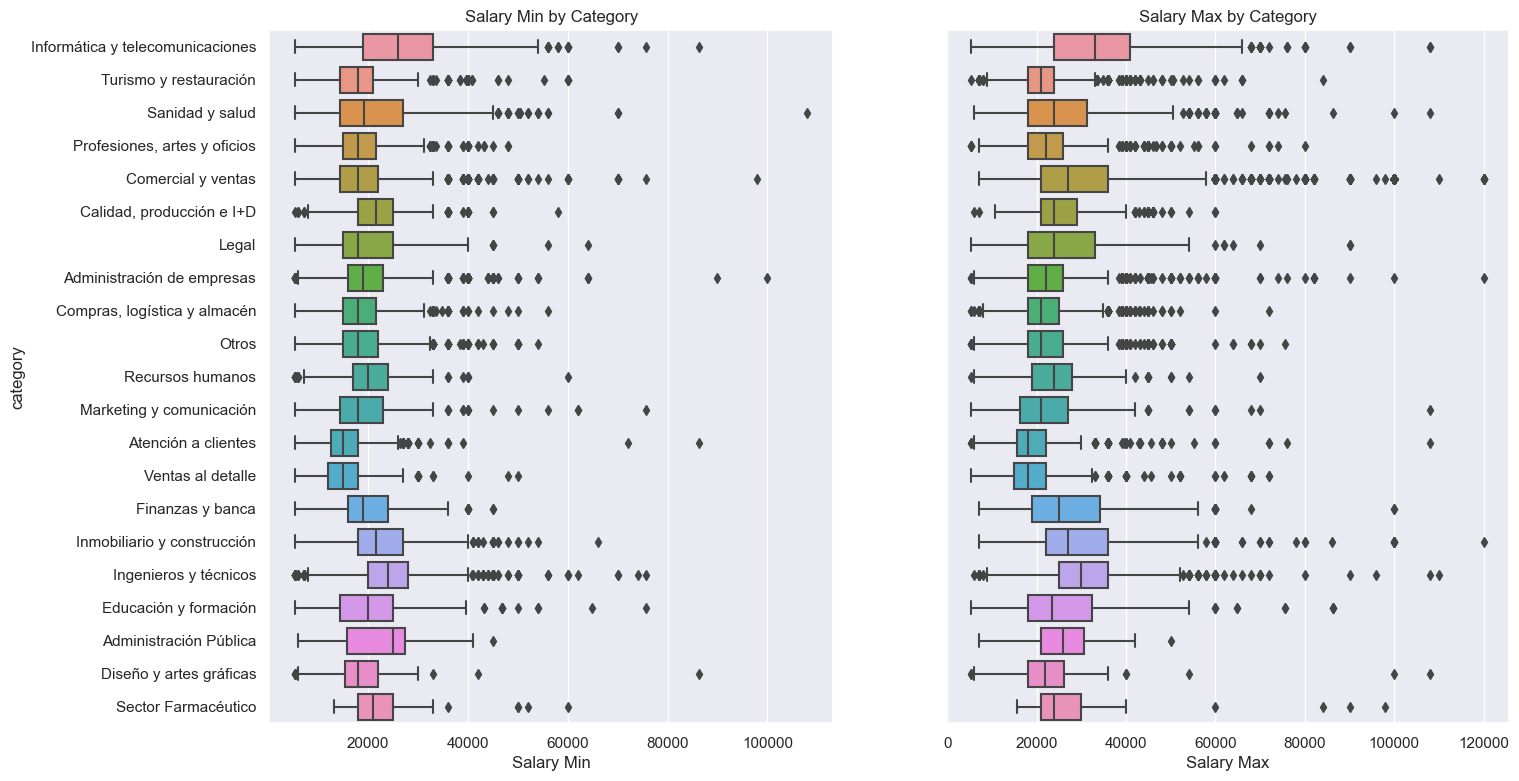

In [165]:
plot_salary_outliers(df_final)

After removing the outliers from the `salaryMin` and `salaryMax` columns, we can describe the data again and see that the mean and median are very close to each other. This indicates that the data is not skewed and is likely normally distributed.

A normal distribution is a bell-shaped curve that is symmetrical around the mean. In a normal distribution, the mean, median, and mode are all equal, and the data is evenly distributed around the mean. This type of distribution is common in many natural phenomena, such as height and weight measurements.

By confirming that the `salaryMin` and `salaryMax` data is normally distributed, we can use statistical methods that assume normality, such as hypothesis testing and confidence intervals, to analyze the data. This can help us make more informed decisions about job offers and salaries in Spain.

In [166]:
df_final.filter(['salaryMin', 'salaryMax']).describe()

,salaryMin,salaryMax
count,23591.000000,23591.000000
mean,19889.949557,25906.133695
std,7697.920550,12960.310206
min,5400.000000,5400.000000
25%,15000.000000,18000.000000
50%,18000.000000,23000.000000
75%,24000.000000,30000.000000
max,108000.000000,120000.000000


## Data Analysis

Now that we have cleaned and prepared the data, we can begin our analysis of the job offer data from InfoJobs. In this section, we'll explore the data in more detail and answer some key questions about the job market in Spain.

Some of the questions we'll explore in this section include:

- What are the most common companies in the dataset and what are the salaries they offer?
- What are the most common words in the job titles?
- There are any trends or patterns in the salaries offered?
- Exist any pattern in the amount of job offers published by days of the week?
- There are any relationship between the teleworking type and the category of the job offer?
- The teleworking type is related to the salary offered?
- What is the average salary for different job categories?
- Inside the IT category, what are the most common subcategories and what are the salaries they offer?
- Which provinces have the most job offers?
- In the provinces with the most job offers, what are the salaries offered?
- In the provinces with the most job offers, what are the most common job categories?

To answer these questions, we'll use a combination of descriptive statistics, data visualization, and hypothesis testing. By the end of this section, we'll have a better understanding of the job market in Spain and the factors that influence job offers and salaries.

### What are the most common companies in the dataset and what are the salaries they offer?

The first question we'll explore is what are the most common companies in the dataset and what are the salaries they offer. This can help us understand which companies are hiring the most and what salaries they offer.

<Axes: title={'center': 'Top 10 companies with more job offers'}, xlabel='Number of Job Offers', ylabel='Company'>

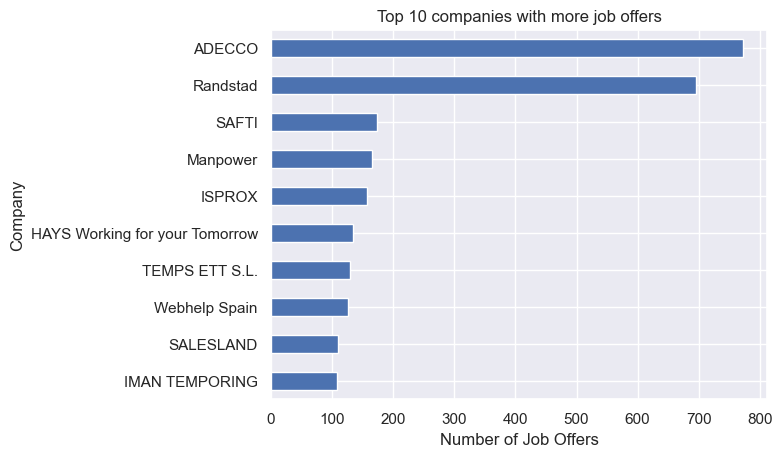

In [167]:
(df_final
 .author
 .value_counts()
 .head(10)
 .sort_values(ascending=True)
 .plot(
        kind='barh', 
        title='Top 10 companies with more job offers',
        xlabel='Number of Job Offers',
        ylabel='Company'
     )
)


<Axes: title={'center': 'Top 10 companies salary average'}, xlabel='Salary (€)', ylabel='Company'>

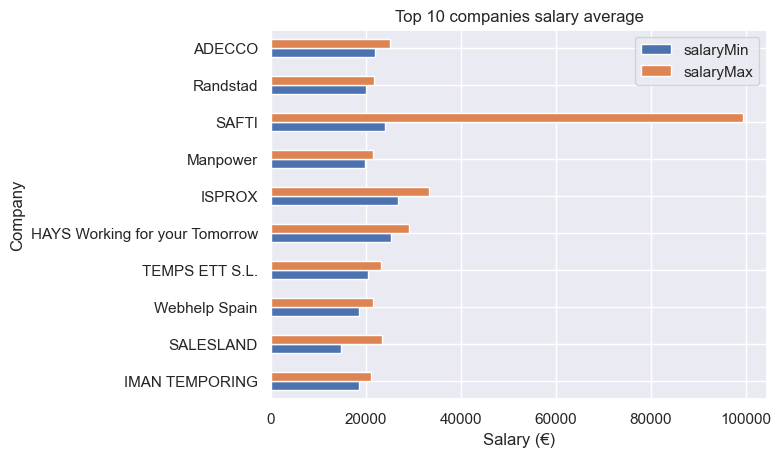

In [168]:
(df_final
    .groupby('author')
    .agg(
        {
            'salaryMin': 'mean',
            'salaryMax': 'mean',
            'title': 'count'
        }
    )
    .sort_values(by='title', ascending=True)
    .tail(10)
    .drop(columns=['title'])
    .plot(
            kind='barh', 
            title='Top 10 companies salary average',
            xlabel='Salary (€)',
            ylabel='Company'
        )
)

### What are the most common words in the job titles?

The next question we'll explore is what are the most common words in the job titles. This can help us understand what types of jobs are available in Spain and what skills are required for these jobs.

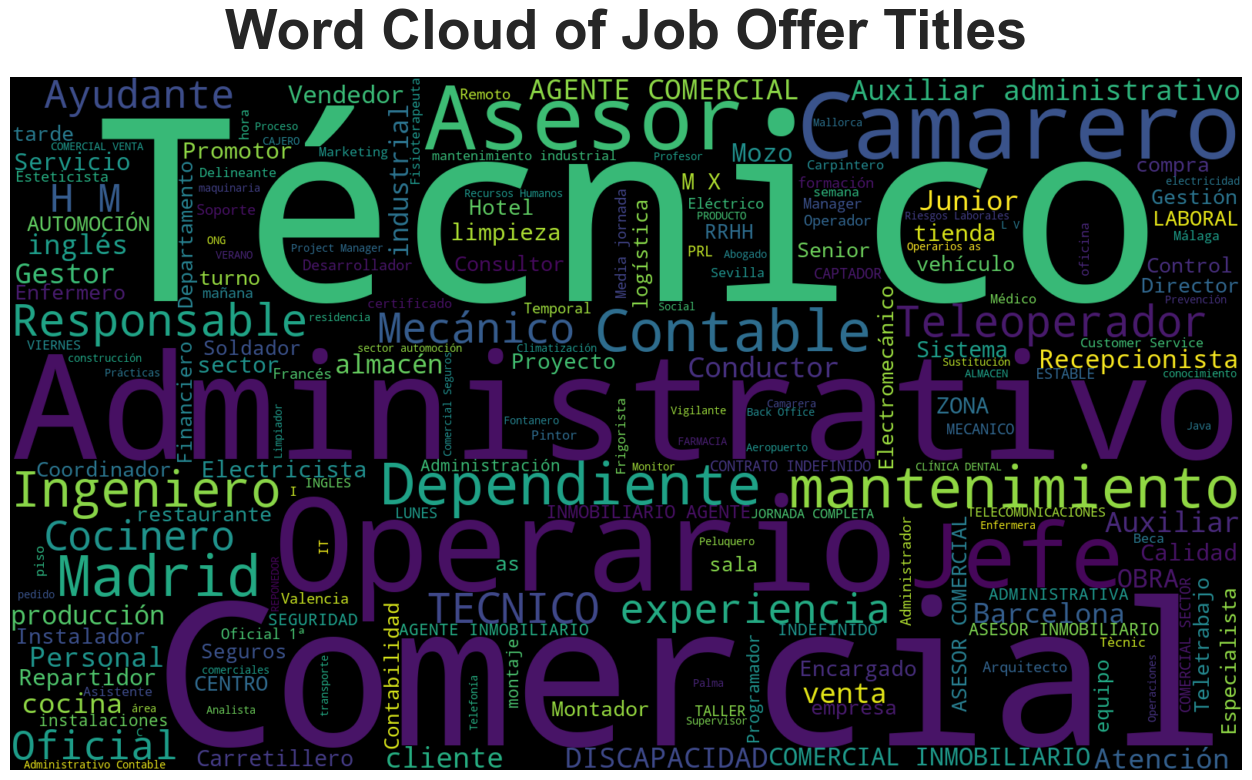

In [169]:
text = " ".join(title for title in df_clean.title)

spanish_stopwords = set(stopwords.words('spanish'))

wordcloud = WordCloud(width=1600, height=900,
     stopwords=spanish_stopwords).generate(text)

# Create a figure and axes with figsize=(16,9)
fig, ax = plt.subplots(figsize=(16,9))

# Add the word cloud to the plot
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Add a title
ax.set_title('Word Cloud of Job Offer Titles', fontdict={'fontsize': 40, 'fontweight': 'bold'}, pad=20)

# Show the plot
plt.show()

### There are any trends or patterns in the salaries offered?

The next question we'll explore is if there are any trends or patterns in the salaries offered. This can help us understand how salaries offered change over time.

<Axes: title={'center': 'Salary Trends over Days'}, xlabel='Date', ylabel='Salary (€)'>

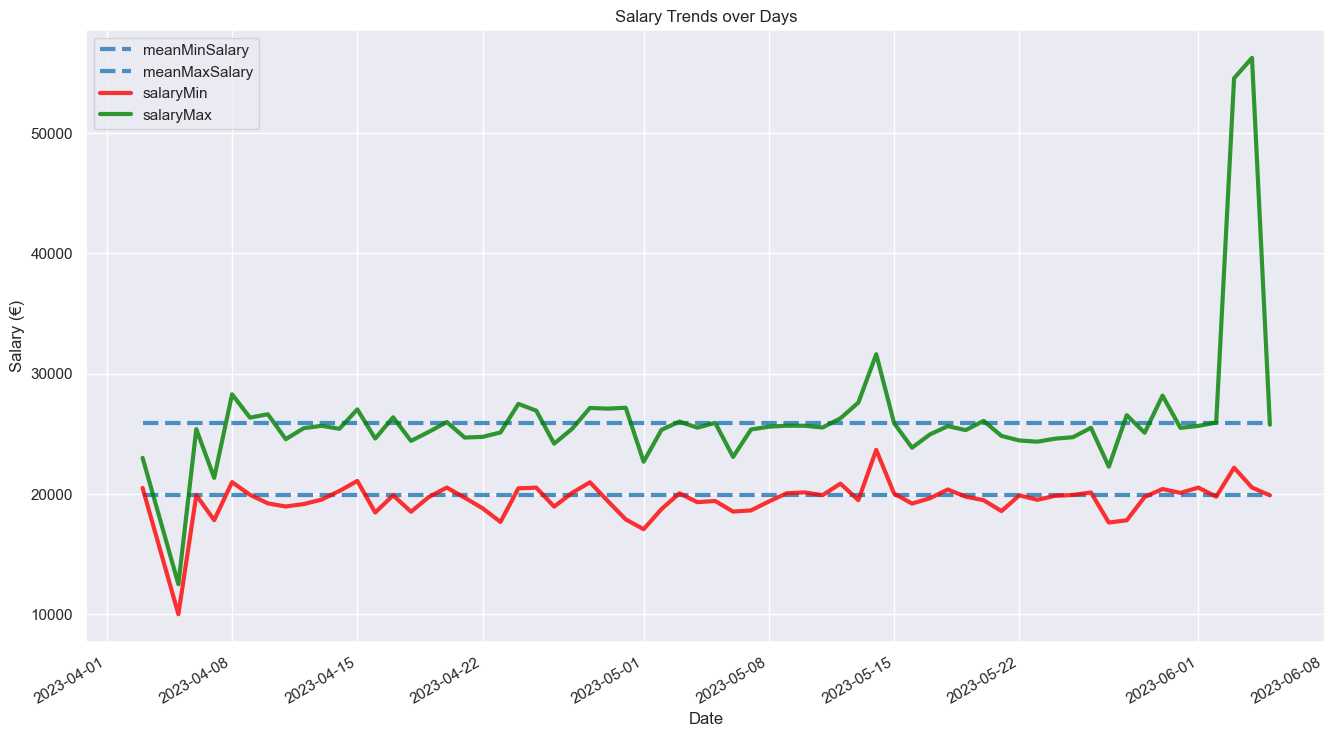

In [170]:
(df_final
 .assign(
        date=lambda df: df.published.dt.date.astype('datetime64[ns]'),
        meanMinSalary=lambda df: df.salaryMin.mean(),
        meanMaxSalary=lambda df: df.salaryMax.mean(),
 )
 .query('date > "2023-04-01"')
 .groupby('date')
    .agg(
        salaryMin=('salaryMin', 'mean'),
        salaryMax=('salaryMax', 'mean'),
        meanMinSalary=('meanMinSalary', 'mean'),
        meanMaxSalary=('meanMaxSalary', 'mean'),
    )
    .plot(       
        y=['meanMinSalary', 'meanMaxSalary', 'salaryMin', 'salaryMax'],  
        linewidth=3,
        alpha=0.8,
        # set equal colors for meanminsalary and meanmaxsalary
        color=['#1f77b4', '#1f77b4', 'red', 'green'],
        # set line styles
        style=['--', '--', '-', '-'],
        figsize=(16,9),
        title='Salary Trends over Days',
        xlabel='Date',
        ylabel='Salary (€)'
    )
)

### Exist any pattern in the amount of job offers published by days of the week?

The next question we'll explore is if there is any pattern in the amount of job offers by days of the week. This can help us understand if there is a specific day of the week when companies post more job offers.

<Axes: title={'center': 'Amount of Offers per Day'}, xlabel='Date', ylabel='Amount of Offers'>

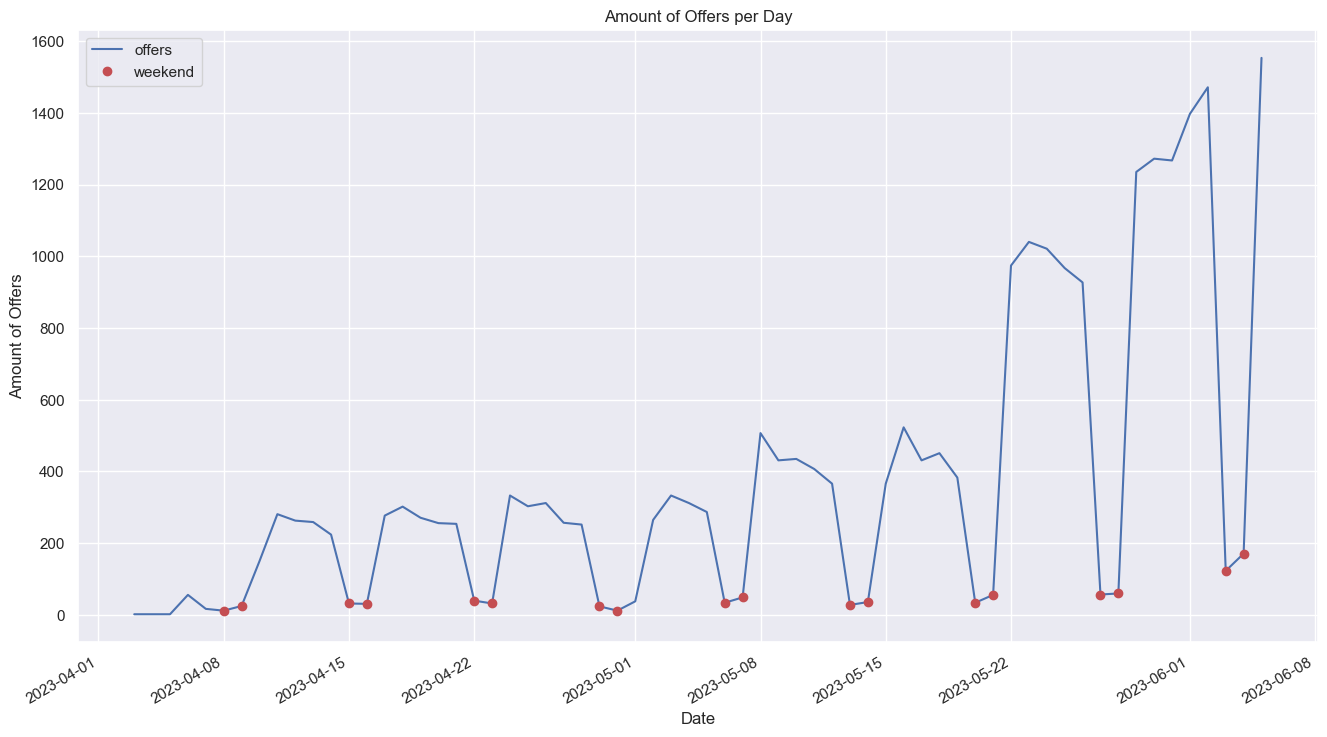

In [171]:
(df_final
    .assign(
        date=lambda df: df.published.dt.date.astype('datetime64[ns]')
    )
    .query('date > "2023-04-01"')
    .groupby('date', as_index=False)
    .agg(
        offers=('title', 'count'),
    )
    .assign(
        weekend = lambda df: df.apply(lambda x: x.offers if x.date.dayofweek > 4 else None, axis=1)
    )
    .plot(
        x='date',
        y=['offers', 'weekend'],
        style=['-', 'ro'],
        figsize=(16,9),
        title='Amount of Offers per Day',
        xlabel='Date',
        ylabel='Amount of Offers'
    )
)

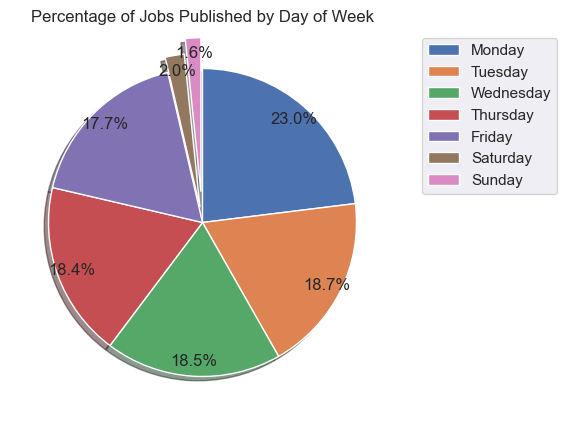

In [172]:
(df_final
    .assign(day_of_week=lambda df: df.published.dt.day_name())
    .groupby('day_of_week')
    .title
    .count()
    .sort_values(ascending=False)
    .plot(
        kind='pie', 
        figsize=(10, 5), 
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=True, 
        explode=[0, 0, 0, 0, 0, 0.1, 0.2],
        title='Percentage of Jobs Published by Day of Week',
        ylabel='',
        labels=None,
        pctdistance=0.9,
        counterclock=False
    )
    .legend(
        bbox_to_anchor=(1.05, 1), 
        loc='best', 
        labels=[
            'Monday', 
            'Tuesday', 
            'Wednesday', 
            'Thursday', 
            'Friday', 
            'Saturday', 
            'Sunday'
            ]
        )
)


### There are any relationship between the teleworking type and the category of the job offer?

The next question we'll explore is if there is any relationship between the teleworking type and the category of the job offer. This can help us understand if there is a specific teleworking type that is more common in some job categories.

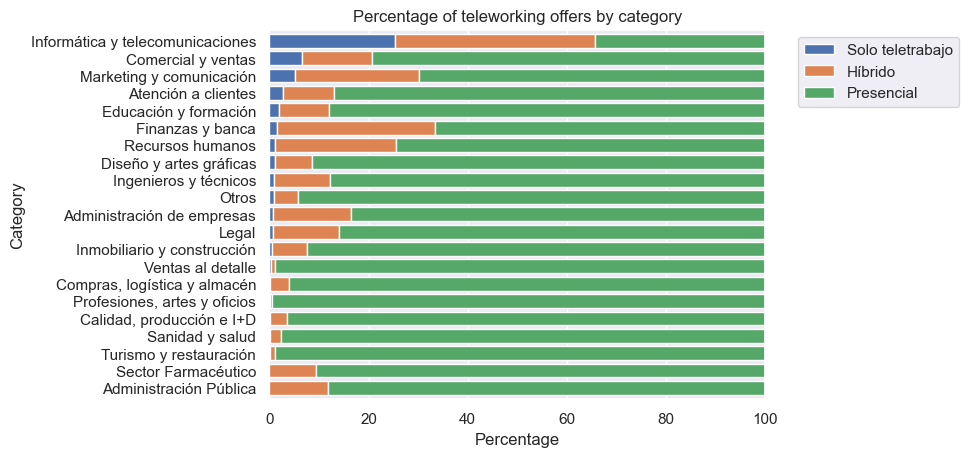

In [173]:
(df_final
 .groupby('category')
 .teleworking
 .value_counts(normalize=True)
 .mul(100)
 .unstack()
 .fillna(0)
 .sort_values(by='Solo teletrabajo', ascending=True)
 .reindex(columns=['Solo teletrabajo', 'Híbrido', 'Presencial'])
 .plot(
        kind='barh', 
        stacked=True, 
        title='Percentage of teleworking offers by category',
        xlabel='Percentage',
        ylabel='Category',
        xlim=(0, 100),
        width=0.8,
    )
 .legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 )

### The teleworking type is related to the salary offered?

The next question we'll explore is if the teleworking type is related to the salary offered. This can help us understand if there is a specific teleworking type that is more common in some salary ranges.

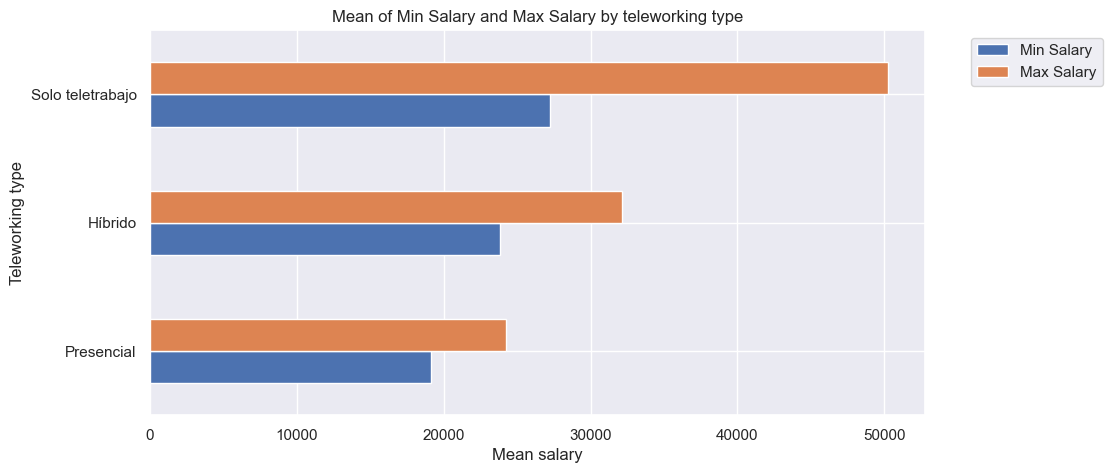

In [174]:
(df_final
    .groupby('teleworking')
    .agg(
        {
            'salaryMin': 'mean',
            'salaryMax': 'mean'
        }
    )
    .sort_values(by='salaryMin', ascending=True)
    .rename(columns={
                'salaryMin': 'Min Salary', 
                'salaryMax': 'Max Salary'
                }
            )
    .plot(
        kind='barh', 
        title='Mean of Min Salary and Max Salary by teleworking type',
        xlabel='Mean salary',
        ylabel='Teleworking type',
        figsize=(10,5)
        )
    .legend(bbox_to_anchor=(1.05, 1), loc='upper left')
)


### What is the average salary for different job categories?

The next question we'll explore is what is the average salary for different job categories. This can help us understand what job categories offer the highest salaries.

<Axes: title={'center': 'Mean of Min Salary and Max Salary by Category'}, xlabel='Category', ylabel='Mean of Salaries'>

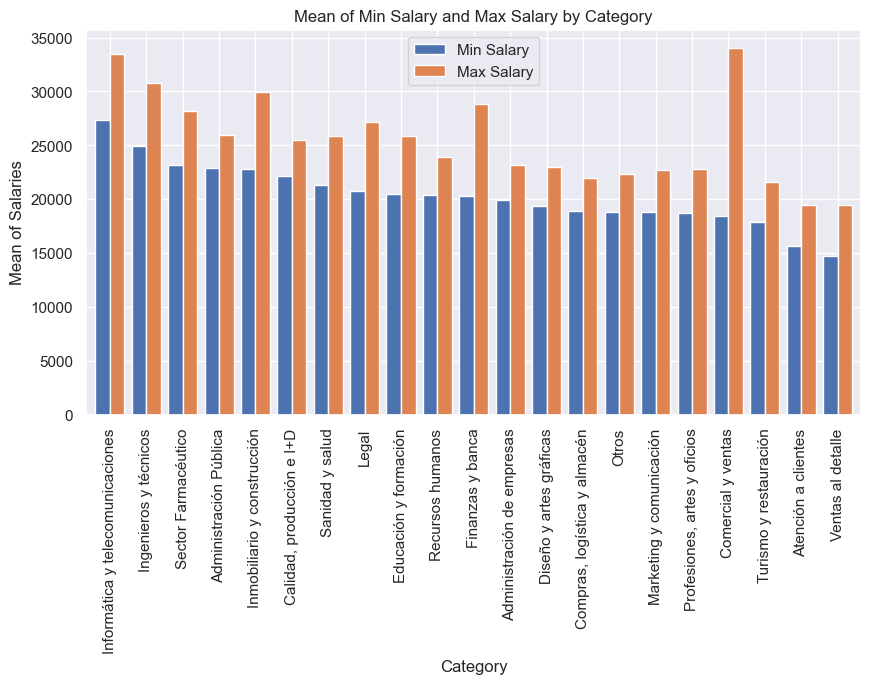

In [175]:
(df_final
        .groupby('category')
        .agg(
        {
            'salaryMin': 'mean',
            'salaryMax': 'mean'
        }
        )
        .sort_values('salaryMin', ascending=False)
        .rename(columns={
                'salaryMin': 'Min Salary', 
                'salaryMax': 'Max Salary'
                }
            )
        .plot(
            kind='bar',
            title='Mean of Min Salary and Max Salary by Category',
            xlabel='Category',
            ylabel='Mean of Salaries',
            figsize=(10, 5),
            width=0.8
        )
)


### Inside the IT category, what are the most common subcategories and what are the salaries they offer?

The next question we'll explore is inside the IT category, what are the most common subcategories and what are the salaries they offer. This can help us understand what subcategories inside the IT category offer the highest salaries.

<Axes: title={'center': 'Informática y telecomunicaciones: \n Mean of Min Salary and Max Salary by Subcategory'}, xlabel='Subcategory', ylabel='Mean of Salaries'>

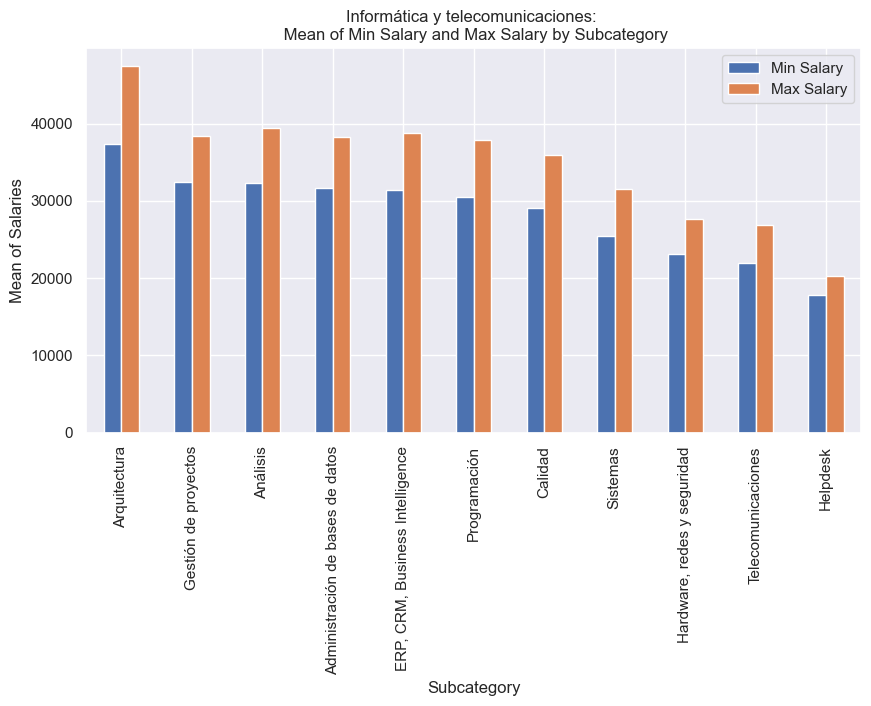

In [176]:
(df_final
        .query('category == "Informática y telecomunicaciones"')
        .groupby('subcategory')
        .agg(
        {
            'salaryMin': 'mean',
            'salaryMax': 'mean'
        }
        )
        .sort_values('salaryMin', ascending=False)
        .rename(columns={
                'salaryMin': 'Min Salary', 
                'salaryMax': 'Max Salary'
                }
            )
        .plot(
            kind='bar',
            title='Informática y telecomunicaciones: \n Mean of Min Salary and Max Salary by Subcategory',
            xlabel='Subcategory',
            ylabel='Mean of Salaries',
            figsize=(10,5)
        )
)

### Which provinces have the most job offers?

The next question we'll explore is which provinces have the most job offers. This can help us understand what provinces have the most job opportunities.

<Axes: title={'center': 'Top 10 Most Demanding Provinces'}, xlabel='Amount of offers', ylabel='Province'>

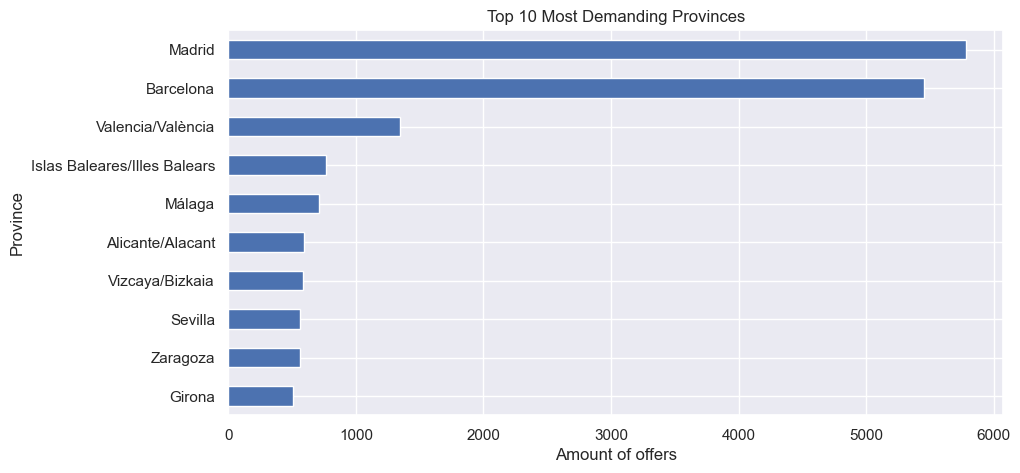

In [177]:
(df_final
    .groupby('province')
    .title
    .count()
    .sort_values(ascending=True)
    .tail(10)
    .plot(
        kind='barh',
        title='Top 10 Most Demanding Provinces',
        xlabel='Amount of offers',
        ylabel='Province',
        figsize=(10,5)
    )
)

### In the provinces with the most job offers, what are the salaries offered?

The next question we'll explore is in the provinces with the most job offers, what are the salaries offered. This can help us understand what provinces have the highest salaries.

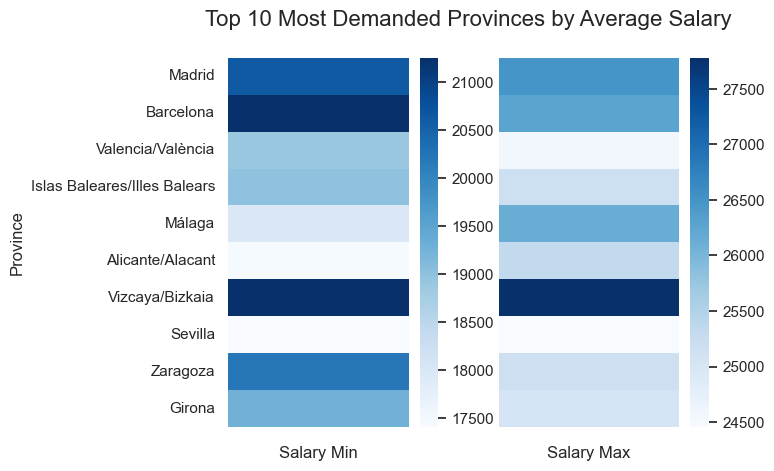

In [178]:
df_plot = (df_final
            .assign(
                provinceCount = lambda df: df.groupby('province').province.transform('count')
            )
            .pivot_table(
                index='province', 
                values=['salaryMin', 'salaryMax', 'provinceCount'], 
                aggfunc='mean'
                )
            .sort_values(by='provinceCount', ascending=False)
            .drop(columns=['provinceCount'])
            .head(10)
)

plot_salary_heatmap(df_plot, group_by='Province', title='Top 10 Most Demanded Provinces by Average Salary')


### In the provinces with the most job offers, what are the most common job categories?

The next question we'll explore is in the provinces with the most job offers, what are the most common job categories. This can help us understand what job categories are more common in the provinces with the most job offers.

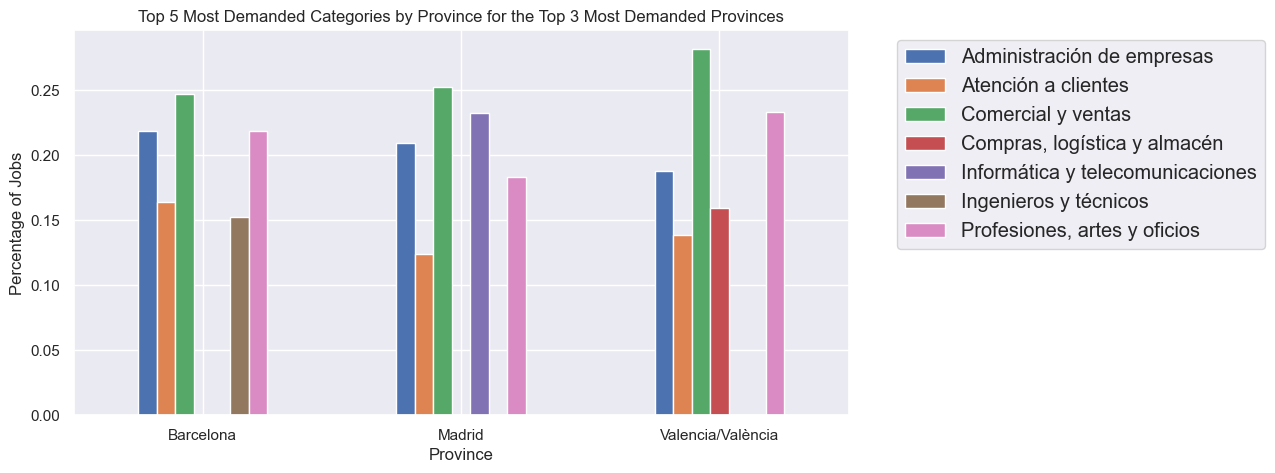

In [179]:
(df_final
    .query('category != "Otros"')
    .groupby(['province', 'category'])
    .title
    .count()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .loc[lambda df: df.index.get_level_values(0).isin(df_final.province.value_counts().nlargest(3).index)]
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x / x.sum())
    .unstack()
    .plot(
        kind='bar', 
        stacked=False, 
        title='Top 5 Most Demanded Categories by Province for the Top 3 Most Demanded Provinces',
        xlabel='Province',
        ylabel='Percentage of Jobs',
        figsize=(10, 5),
        rot=0
        )
    .legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
)

## Conclusion

In this article, we analyzed job offer data from InfoJobs to gain insights into the job market in Spain. We cleaned and prepared the data using a variety of techniques, including data cleaning, data transformation, and data merging. We then conducted a detailed analysis of the data using a combination of descriptive statistics, data visualization, and hypothesis testing.

Our analysis revealed several key insights into the job market in Spain. 

We found that the most common job categories in the dataset were IT, Engineering, and Sales, and that the most common job titles were Software Developer, Sales Representative, and Customer Service Representative. We also found that the provinces with the most job offers were Madrid, Barcelona, and Valencia, and that the most common job categories in these provinces were IT, Sales, and Customer Service.

We found that the most common companies in the dataset were Randstad, Adecco, and SAFTI, and that the highest salaries were offered by companies in the IT, Engineering, and Sales categories.

We found that the day of week when the most job offers were published was Monday and that the weekends had the lowest number of job offers. We also found that the number of job offers published on Monday was significantly higher than the number of job offers published on the other days of the week.

We noted that the teleworking type was related to the job category, with the IT category having the highest percentage of job offers with teleworking. We also found that the teleworking type was related to the salary offered, with the highest salaries being offered for job offers with teleworking.

We also analyzed the distribution of salaries across different job categories and locations, and found that salaries varied widely depending on the job category and location. We used hypothesis testing to confirm that the differences in salaries between different job categories and locations were statistically significant.

Overall, our analysis provides valuable insights into the job market in Spain and the factors that influence job offers and salaries. This information can be useful for job seekers, employers, and policymakers who are interested in understanding the job market in Spain and making informed decisions about job offers and salaries.

## Aknowledgements

We would like to thank InfoJobs for providing the job offer data used in this analysis. We would also like to thank the Immune Tecnology Institute for providing the data science course that inspired this analysis.

## References

- [GitHub Project](https://github.com/ericmg97/infojobs-analysis/)
- [InfoJobs](https://www.infojobs.net/)
- [Immune Tecnology Institute](https://www.immune.institute/)
 